<h1 align = 'center'> Neural Networks Demystified </h1>
<h2 align = 'center'> Part 1: Data and Architecture </h2>


<h4 align = 'center' > @stephencwelch </h4>

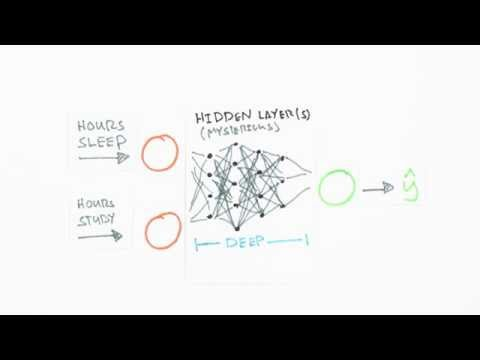

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('bxe2T-V8XRs')

<h3 align = 'center'> Variables </h3>

|Code Symbol | Math Symbol | Definition | Dimensions
| :-: | :-: | :-: | :-: |
|X|$$X$$|Input Data, each row is an example| (numExamples, inputLayerSize)|
|y |$$y$$|target data|(numExamples, outputLayerSize)|

Let’s say you want to predict some output value y, given some input value X. For example, maybe you want to predict your score on a test based on how many hours you sleep and how many hours you study the night before. To use a machine learning approach, we first need some data. Let’s say for the last three tests, you recorded your number of hours of studying, your number of hours sleeping, and your score on the test. We'll use the programming language python to store our data in 2-dimensional numpy arrays.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

In [4]:
X

array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  2.]])

In [5]:
y

array([[75.],
       [82.],
       [93.]])

Now that we have some data, we’re going to use it to train a model to predict how you will do on your next test, based on how many hours you sleep and how many hours you study. This is called a supervised regression problem. It’s supervised because our examples have inputs and outputs. It’s a regression problem because we’re predicting your test score, which is a continuous output. If we we’re predicting your letter grade, this would be called a classification problem, and not a regression problem.

There are an overwhelming number of models within machine learning, here we’re going to use a particularly interesting one called an artificial neural network. These guys are loosely based on how the neurons in your brain work, and have been particularly successful recently at solving really big, really hard problems.

 Before we throw our data into the model, we need to account for the differences in the units of our data. Both of our inputs are in hours, but our output is a test score, scaled between 0 and 100. Neural networks are smart, but not smart enough to guess the units of our data. It’s kind of like asking our model to compare apples to oranges, where most learning models really only want to compare apples to apples. The solution is to scale our data, this way our model only sees standardized units. Here, we're going to take advantage of the fact that all of our data is positive, and simply divide by the maximum value for each variable, effectively scaling the result between 0 and 1. 

In [6]:
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

In [7]:
X

array([[0.3, 1. ],
       [0.5, 0.2],
       [1. , 0.4]])

In [8]:
y

array([[0.75],
       [0.82],
       [0.93]])

Now we can build our Neural Net. We know our network must have 2 inputs and 1 output, because these are the dimensions of our data. We’ll call our output y hat, because it’s an estimate of y, but not the same as y. Any layer between our input and output layer is called a hidden layer. Recently, researchers have built networks with many many hidden layers. These are known as a deep belief networks, giving rise to the term deep learning. Here, we’re going to use 1 hidden layer with 3 hidden units, but if we wanted to build a deep neural network, we would just stack a bunch of layers together.

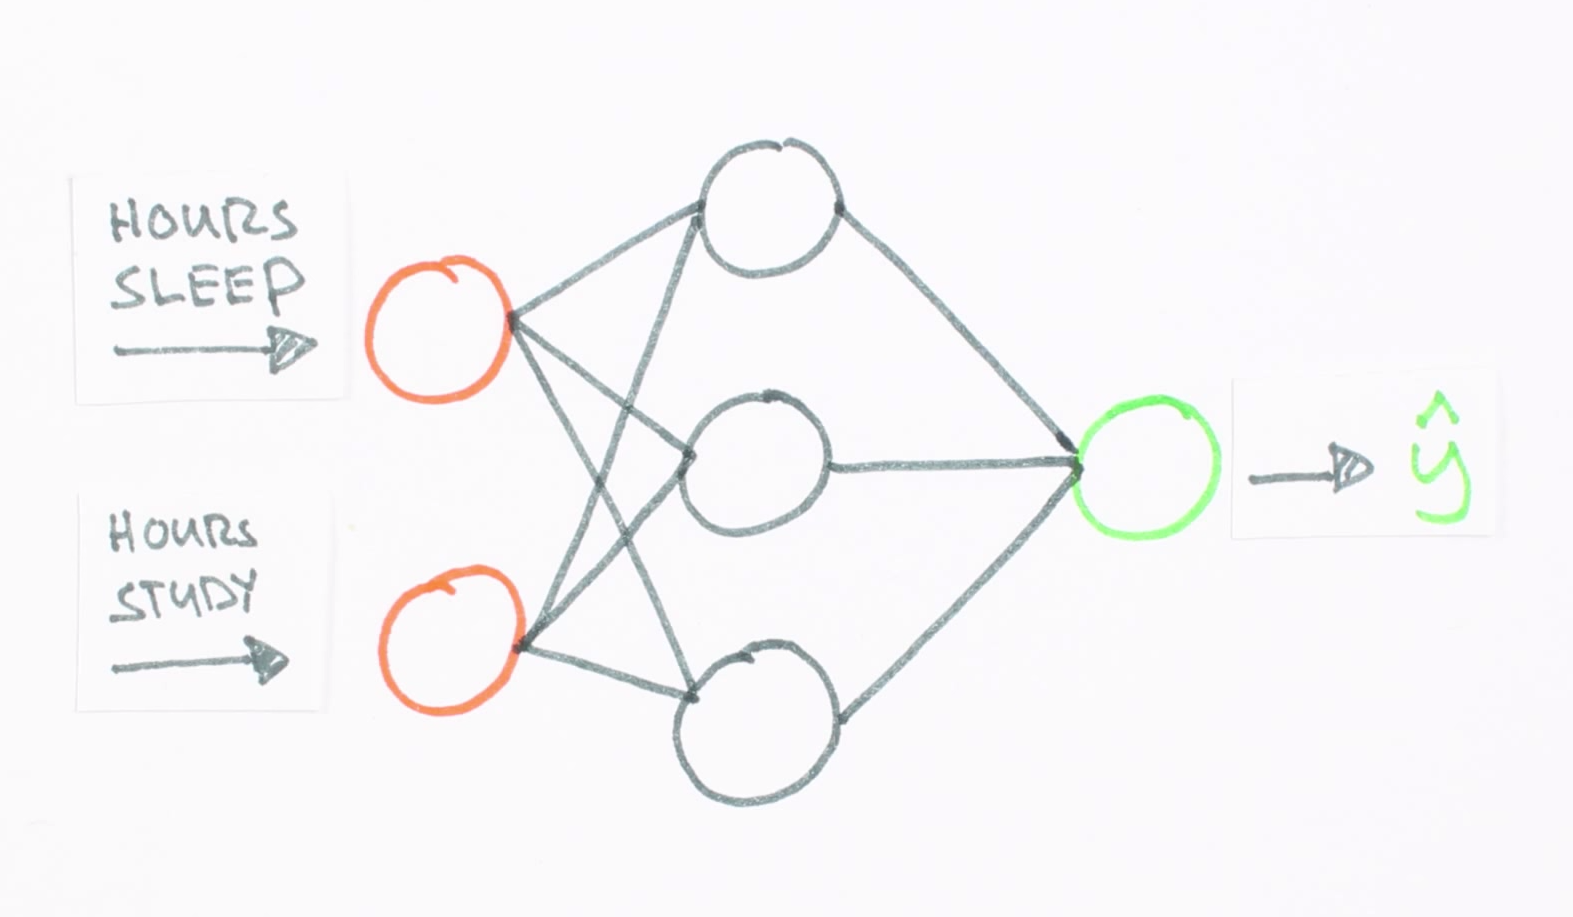

In [9]:
from IPython.display import Image
i = Image(filename='images/simpleNetwork.png')
i

In neural net visuals, circles represent neurons and lines represent synapses. Synapses have a really simple job, they take a value from their input, multiply it by a specific weight, and output the result. Neurons are a little more complicated. Their job is to add together the outputs of all their synapses, and apply an activation function. Certain activation functions allow neural nets to model complex non-linear patterns, that simpler models may miss. For our neural net, we’ll use sigmoid activation functions. Next, we'll build out our neural net in python.